In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import adaptedplot_solution_1, adaptedplot_solution_2

In this workspace, you will work with the fuel economy dataset from the previous lesson on bivariate plots.

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [6]:
sedan_group = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
sedan_dtype = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_group)
fuel_econ.VClass = fuel_econ.VClass.astype(sedan_dtype)

In [8]:
# check is every value is in the right spot
fuel_econ.VClass.value_counts()

Midsize Cars        1188
Compact Cars        1122
Subcompact Cars      673
Large Cars           625
Minicompact Cars     321
Name: VClass, dtype: int64

In [ ]:
sb.barplot(data=fuel_econ, x='VClass')

In [13]:
# generate the mean df
df = fuel_econ.copy()

# Parse necessary information
df = df[['VClass', 'city', 'highway']]

# melt down city and highway
df = pd.melt(df, id_vars='VClass', var_name='type', value_name='efficiency')

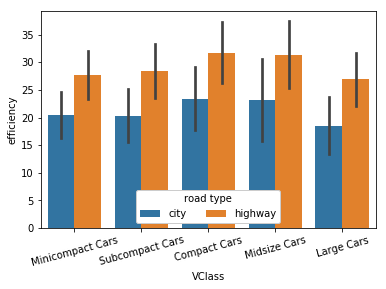

In [24]:
sb.barplot(data=df, x='VClass', y='efficiency', hue='type', ci='sd')
plt.xticks(rotation=15)
plt.legend(loc=8, ncol=3, framealpha=1, title='road type');

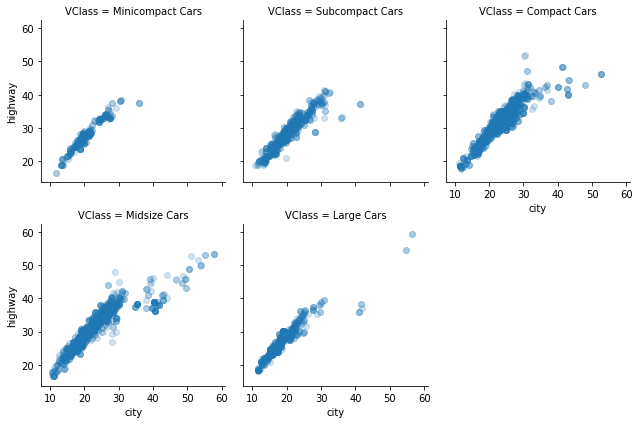

In [32]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3)
g.map(plt.scatter, 'city', 'highway', alpha=0.2);

Due to overplotting, I've taken a faceting approach to this task. There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts. The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.


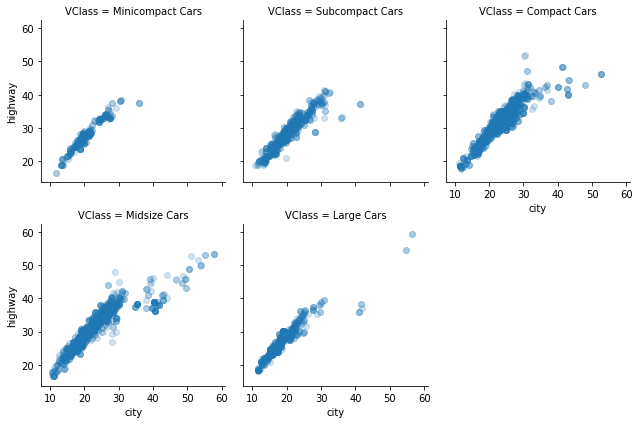

In [23]:
# run this cell to check your work against ours
adaptedplot_solution_1()

**Task 2**: Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [38]:
# generate new dataframe for convenient
df = fuel_econ.copy()

# parse necessary information
df = df[['displ', 'VClass', 'fuelType']]

# leave only Premium Gasoline and Regular Gasoline
df = df.query('fuelType == "Premium Gasoline" or fuelType == "Regular Gasoline"')
df.head(5)

,displ,VClass,fuelType
0,3.8,Subcompact Cars,Premium Gasoline
1,2.0,Compact Cars,Premium Gasoline
2,3.6,Compact Cars,Premium Gasoline
3,3.6,Compact Cars,Premium Gasoline
4,2.4,Midsize Cars,Regular Gasoline


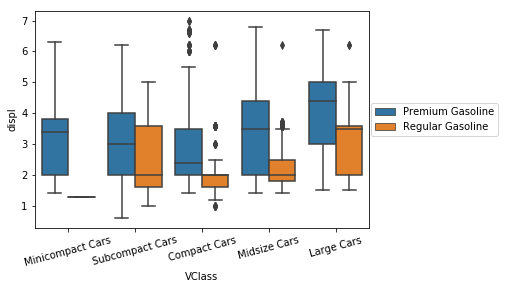

In [52]:
sb.boxplot(data=df, x='VClass', y='displ', hue='fuelType')
plt.xticks(rotation=15)
plt.legend(loc=5, bbox_to_anchor=(1.4, 0.5));

I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars. Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.


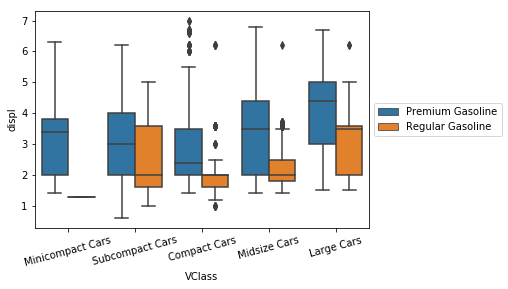

In [33]:
# run this cell to check your work against ours
adaptedplot_solution_2()